In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('insurance.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1340 non-null   int64  
 1   age            1335 non-null   float64
 2   gender         1340 non-null   object 
 3   bmi            1340 non-null   float64
 4   bloodpressure  1340 non-null   int64  
 5   diabetic       1340 non-null   object 
 6   children       1340 non-null   int64  
 7   smoker         1340 non-null   object 
 8   region         1337 non-null   object 
 9   claim          1340 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 104.8+ KB


In [7]:
df.shape

(1340, 10)

In [8]:
pd.set_option("display.float_format", "{:.2f}".format)

In [9]:
sns.set(style="whitegrid", palette="Set2", font_scale= 1.1)

In [10]:
df.duplicated().sum()

0

In [11]:
df.isna().sum()

Id               0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [12]:
df.dropna(inplace= True)

In [13]:
df.shape

(1332, 10)

In [14]:
df.isna().sum().sum()

0

In [15]:
df.describe(include = "all")

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
count,1332.00,1332.00,1332,1332.00,1332.00,1332,1332.00,1332,1332,1332.00
unique,NaN,NaN,2,NaN,NaN,2,NaN,2,4,NaN
top,NaN,NaN,male,NaN,NaN,No,NaN,No,southeast,NaN
freq,NaN,NaN,670,NaN,NaN,695,NaN,1058,442,NaN
mean,674.47,38.09,NaN,30.66,94.19,NaN,1.10,NaN,NaN,13325.25
std,384.70,11.11,NaN,6.12,11.45,NaN,1.21,NaN,NaN,12109.62
min,1.00,18.00,NaN,16.00,80.00,NaN,0.00,NaN,NaN,1121.87
25%,341.75,29.00,NaN,26.20,86.00,NaN,0.00,NaN,NaN,4760.16
50%,674.50,38.00,NaN,30.35,92.00,NaN,1.00,NaN,NaN,9412.97
75%,1007.25,47.00,NaN,34.73,99.00,NaN,2.00,NaN,NaN,16781.33


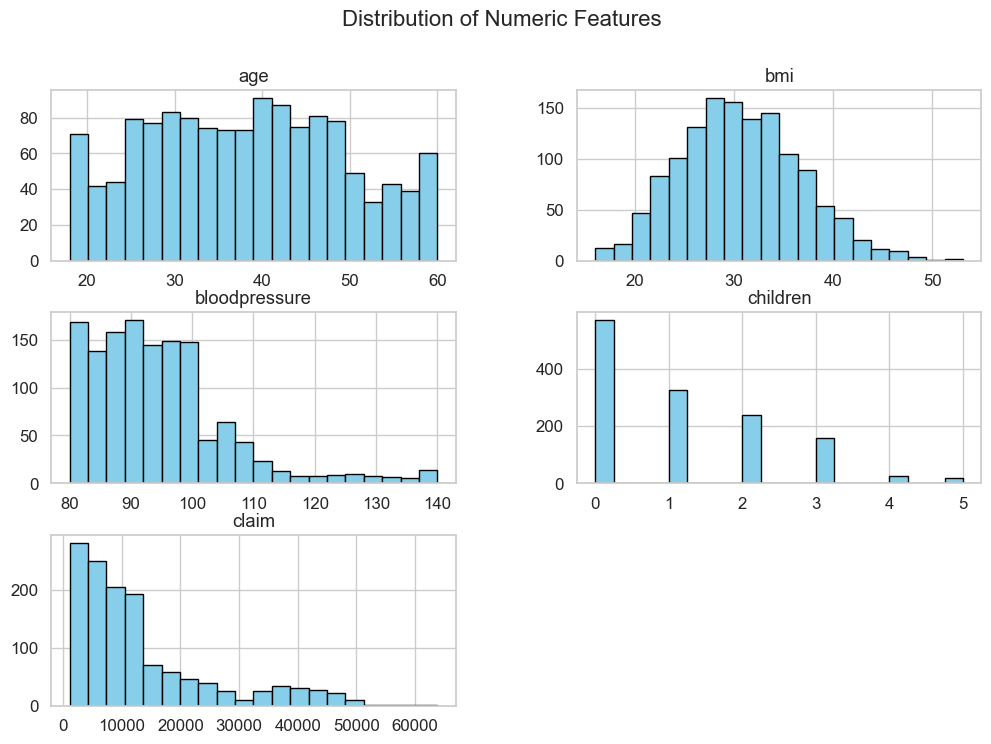

In [17]:
numeric_cols = ["age", "bmi", "bloodpressure", "children", "claim"]
df[numeric_cols].hist(bins=20, figsize=(12, 8), color = "skyblue",edgecolor = "black")
plt.suptitle("Distribution of Numeric Features", fontsize=16)
plt.show()

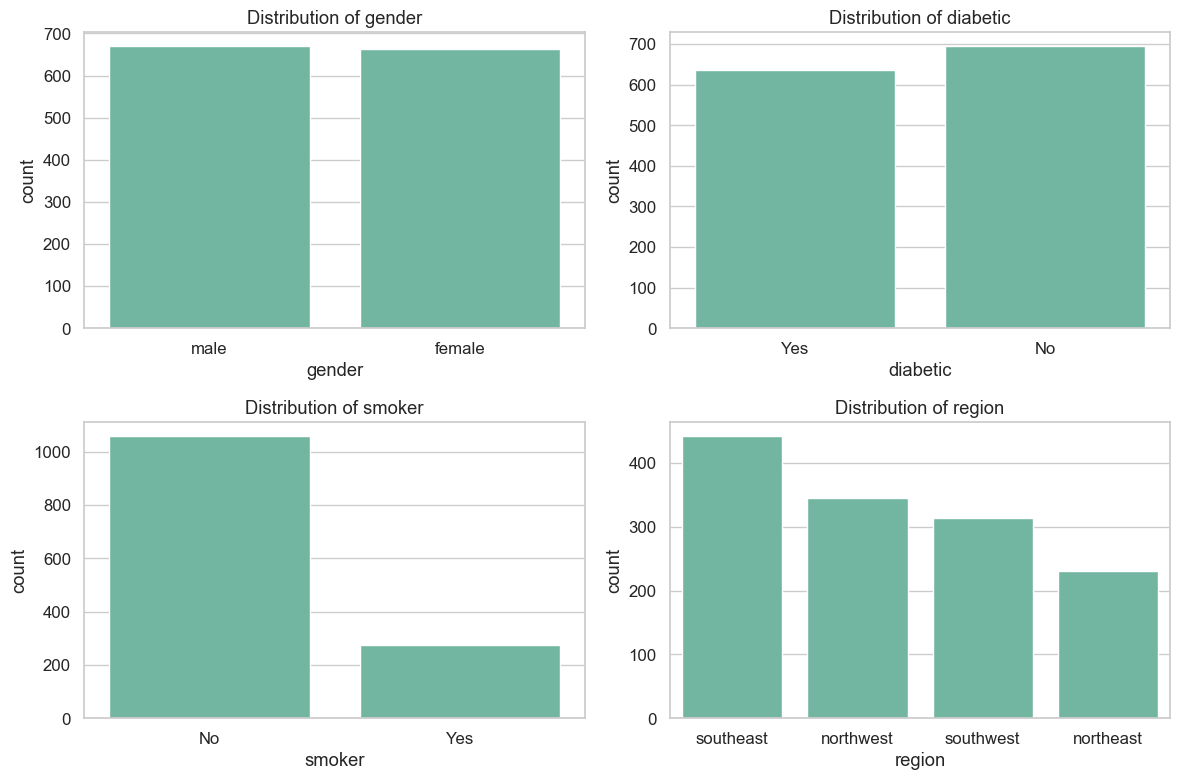

In [18]:
cat_cols = ["gender","diabetic", "smoker", "region"]

plt.figure(figsize=(12,8))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(2,2, i)
    sns.countplot(data=df, x=col)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

In [19]:
df.groupby(["gender", "smoker"])["claim"].mean().round(2)

gender  smoker
female  No        8762.30
        Yes      30679.00
male    No        8169.25
        Yes      33042.01
Name: claim, dtype: float64

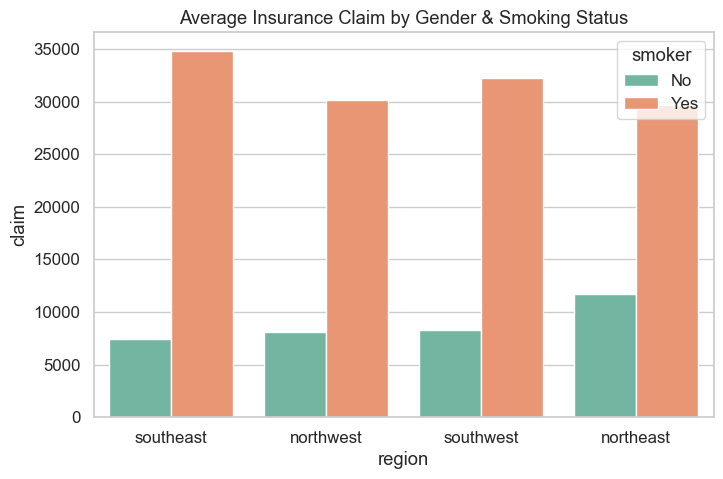

In [20]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="region", y="claim", hue="smoker", estimator="mean", errorbar=None)
plt.title("Average Insurance Claim by Gender & Smoking Status")
plt.show()

In [21]:
pivot_region_diabetic = df.groupby(["region","diabetic"])["claim"].mean().unstack()

In [22]:
pivot_region_diabetic

diabetic,No,Yes
region,,
northeast,16966.86,16818.30
northwest,11442.83,12224.96
southeast,13578.72,12574.09
southwest,13069.91,12313.74


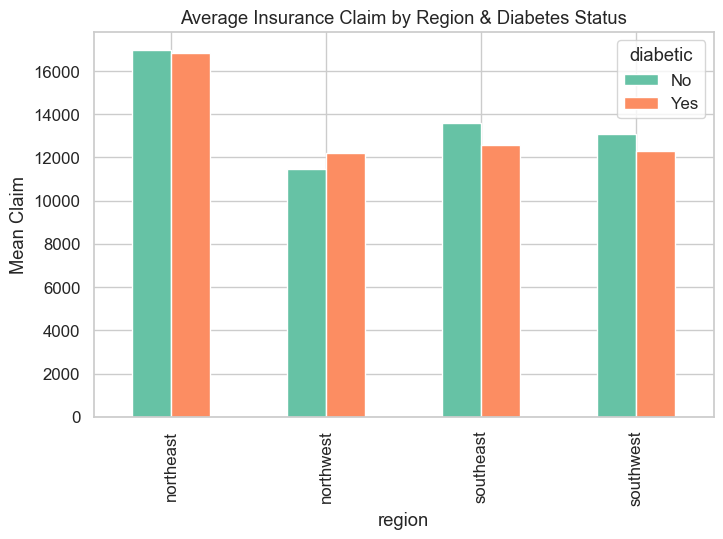

In [23]:
pivot_region_diabetic.plot(kind="bar", figsize=(8,5))
plt.title("Average Insurance Claim by Region & Diabetes Status")
plt.ylabel("Mean Claim")
plt.show()

In [24]:
pivot_table = pd.pivot_table(df,values="claim", index="region",columns="smoker", aggfunc="mean")
pivot_table

smoker,No,Yes
region,,
northeast,11666.11,29673.54
northwest,8076.20,30192.00
southeast,7444.14,34845.00
southwest,8294.75,32269.06


In [25]:
pivot_table = pd.pivot_table(df, values= "claim", index= "children", columns= "diabetic", aggfunc= "mean")
pivot_table

diabetic,No,Yes
children,,
0,12967.40,11985.29
1,12730.46,12732.06
2,15567.77,14579.36
3,13807.61,17091.26
4,14106.63,13573.35
5,8519.04,9205.59


In [26]:
df[numeric_cols].corr()

,age,bmi,bloodpressure,children,claim
age,1.00,-0.04,-0.06,-0.03,-0.03
bmi,-0.04,1.00,0.14,0.01,0.20
bloodpressure,-0.06,0.14,1.00,-0.03,0.53
children,-0.03,0.01,-0.03,1.00,0.06
claim,-0.03,0.20,0.53,0.06,1.00


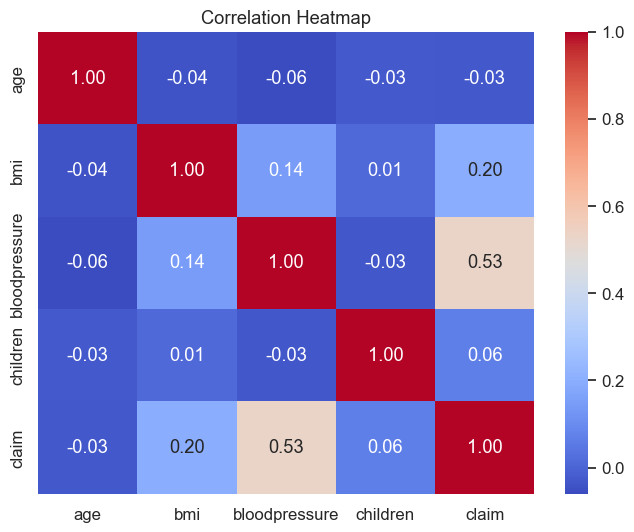

In [27]:
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot= True, cmap= "coolwarm", fmt= ".2f")
plt.title("Correlation Heatmap")
plt.show()

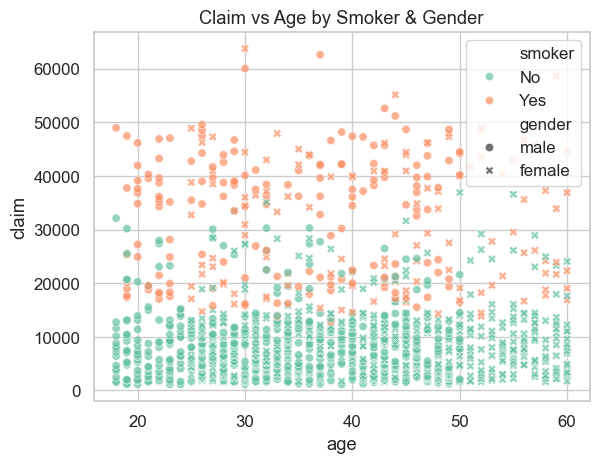

In [28]:
sns.scatterplot(data= df, x="age", y="claim", hue="smoker", style= "gender", alpha= 0.7)
plt.title("Claim vs Age by Smoker & Gender")
plt.show()

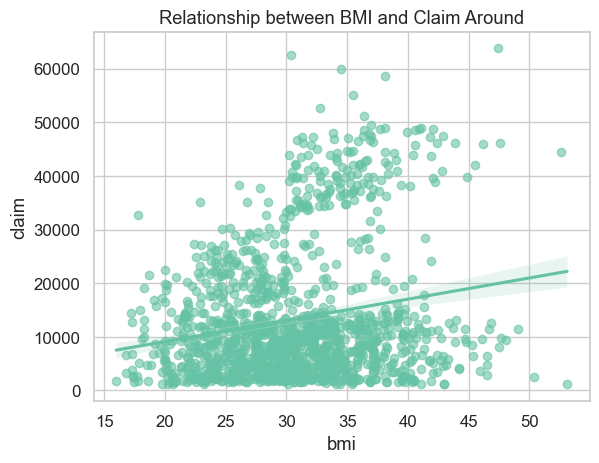

In [29]:
sns.regplot(data= df, x="bmi", y="claim", scatter_kws={"alpha":0.6})
plt.title("Relationship between BMI and Claim Around")
plt.show()

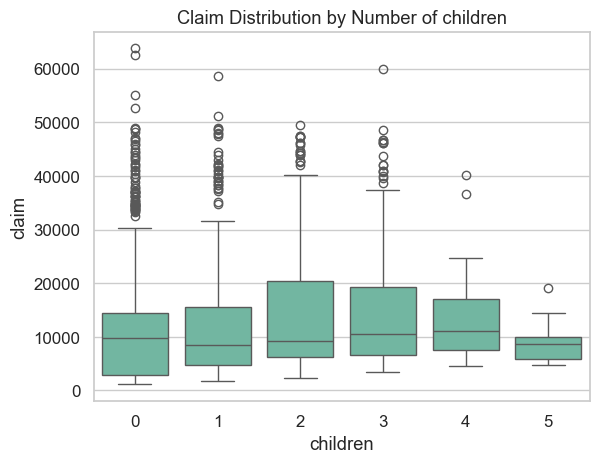

In [31]:
sns.boxplot(data=df, x="children", y="claim")
plt.title("Claim Distribution by Number of children")
plt.show()

In [32]:
df["age_group"] = pd.cut(df["age"], bins=[0,18,30,45,60,100], labels=["<18", "18-30", "31-45", "46-60", "60+"]) 

In [33]:
df

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,age_group
0,1,39.00,male,23.20,91,Yes,0,No,southeast,1121.87,31-45
1,2,24.00,male,30.10,87,No,0,No,southeast,1131.51,18-30
7,8,19.00,male,41.10,100,No,0,No,northwest,1146.80,18-30
8,9,20.00,male,43.00,86,No,0,No,northwest,1149.40,18-30
9,10,30.00,male,53.10,97,No,0,No,northwest,1163.46,18-30
...,...,...,...,...,...,...,...,...,...,...,...
1335,1336,44.00,female,35.50,88,Yes,0,Yes,northwest,55135.40,31-45
1336,1337,59.00,female,38.10,120,No,1,Yes,northeast,58571.07,46-60
1337,1338,30.00,male,34.50,91,Yes,3,Yes,northwest,60021.40,18-30
1338,1339,37.00,male,30.40,106,No,0,Yes,southeast,62592.87,31-45


In [34]:
df["age_group"].value_counts().sort_index()

age_group
<18       16
18-30    380
31-45    553
46-60    383
60+        0
Name: count, dtype: int64

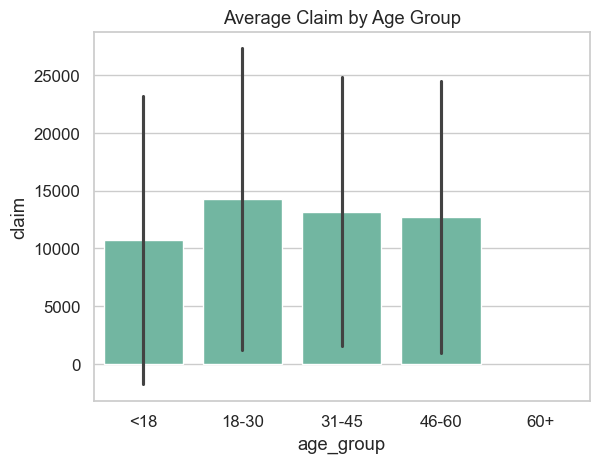

In [35]:
sns.barplot(data= df, x="age_group", y="claim", estimator= "mean", errorbar= "sd")
plt.title("Average Claim by Age Group")
plt.show()

In [36]:
df["bmi_category"] = pd.cut(df["bmi"], bins=[0, 18.5, 24.9, 29.9, 100], labels= ["Underweight", "Normal", "Overweight", "Obese"])

In [37]:
df["bmi_category"].value_counts().sort_index()

bmi_category
Underweight     21
Normal         222
Overweight     387
Obese          702
Name: count, dtype: int64

In [38]:
import warnings
warnings.filterwarnings("ignore")

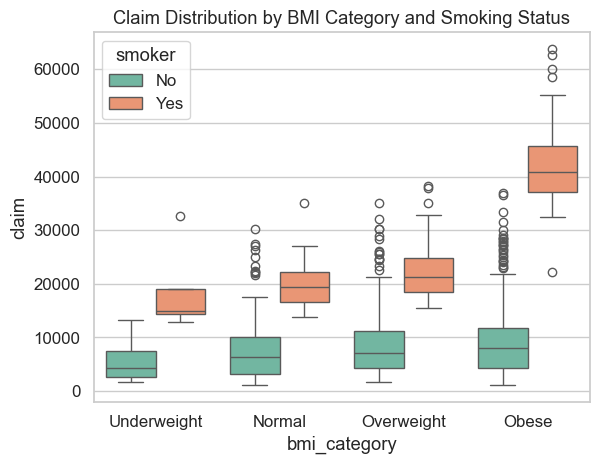

In [39]:
sns.boxplot(data=df, x="bmi_category", y="claim", hue="smoker")
plt.title("Claim Distribution by BMI Category and Smoking Status")
plt.show()

In [40]:
region_stats = df.groupby("region").agg(
    smoker_rate = ("smoker", lambda x: (x=="Yes").mean() * 100),
    mean_claim = ("claim", "mean")
).reset_index()

In [41]:
region_stats

,region,smoker_rate,mean_claim
0,northeast,29.00,16889.04
1,northwest,16.81,11794.22
2,southeast,20.59,13085.50
3,southwest,18.47,12723.13


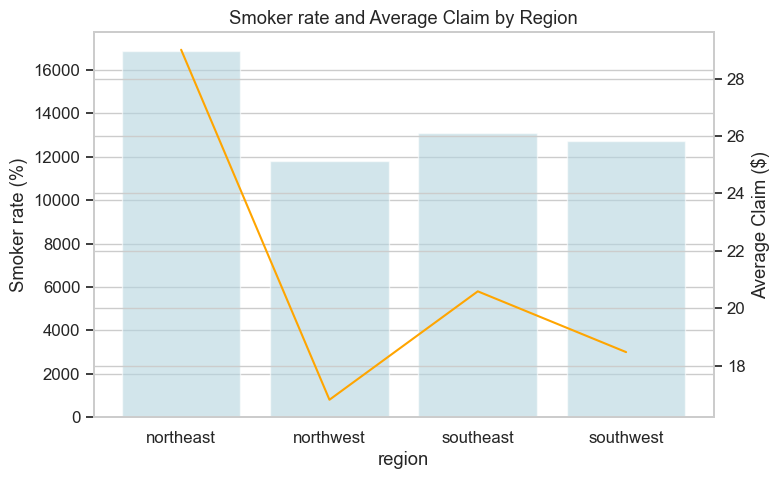

In [42]:
fig, ax1 = plt.subplots(figsize=(8,5))
sns.barplot(data= region_stats, x="region", y="mean_claim", ax=ax1, alpha=0.6, color="lightblue")
ax2 = ax1.twinx()
sns.lineplot(data= region_stats, x="region", y="smoker_rate", ax=ax2, color="orange")
ax1.set_ylabel("Smoker rate (%)")
ax2.set_ylabel("Average Claim ($)")
plt.title("Smoker rate and Average Claim by Region")
plt.show()

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler  
import joblib

In [44]:
df.columns

Index(['Id', 'age', 'gender', 'bmi', 'bloodpressure', 'diabetic', 'children',
       'smoker', 'region', 'claim', 'age_group', 'bmi_category'],
      dtype='object')

In [45]:
x = df[["age", "gender", "bmi", "bloodpressure", "diabetic", "children", "smoker"]]
y = df["claim"]

In [46]:
x

,age,gender,bmi,bloodpressure,diabetic,children,smoker
0,39.00,male,23.20,91,Yes,0,No
1,24.00,male,30.10,87,No,0,No
7,19.00,male,41.10,100,No,0,No
8,20.00,male,43.00,86,No,0,No
9,30.00,male,53.10,97,No,0,No
...,...,...,...,...,...,...,...
1335,44.00,female,35.50,88,Yes,0,Yes
1336,59.00,female,38.10,120,No,1,Yes
1337,30.00,male,34.50,91,Yes,3,Yes
1338,37.00,male,30.40,106,No,0,Yes


In [47]:
cat_cols = ["gender", "diabetic", "smoker"]
label_encoders = {}

In [48]:
for col in cat_cols:
    le = LabelEncoder()
    x[col] = le.fit_transform(x[col])
    label_encoders[col] = le

    joblib.dump(le, f"label_encoder_{col}.pkl")

In [49]:
x

,age,gender,bmi,bloodpressure,diabetic,children,smoker
0,39.00,1,23.20,91,1,0,0
1,24.00,1,30.10,87,0,0,0
7,19.00,1,41.10,100,0,0,0
8,20.00,1,43.00,86,0,0,0
9,30.00,1,53.10,97,0,0,0
...,...,...,...,...,...,...,...
1335,44.00,0,35.50,88,1,0,1
1336,59.00,0,38.10,120,0,1,1
1337,30.00,1,34.50,91,1,3,1
1338,37.00,1,30.40,106,0,0,1


In [50]:
label_encoders

{'gender': LabelEncoder(),
 'diabetic': LabelEncoder(),
 'smoker': LabelEncoder()}

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)

In [52]:
num_cols = ["age", "bmi", "bloodpressure", "children"]
scaler = StandardScaler()

In [53]:
x_train[num_cols] = scaler.fit_transform(x_train[num_cols])
x_test[num_cols] = scaler.transform(x_test[num_cols])

In [54]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [55]:
print(x_train.shape, y_train.shape)

(1065, 7) (1065,)


In [56]:
print(x_test.shape, y_test.shape)

(267, 7) (267,)


In [57]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

In [55]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [58]:
def evaluate_model(model, x_train, x_test, y_train, y_test):
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rase = np.sqrt(mean_squared_error(y_test, y_pred))
    return {"R2" : r2, "MAE": mae, "RASE": rase}

In [59]:
results = {}

In [60]:
lr = LinearRegression()
lr.fit(x_train, y_train)
results["LinearRegression"] = evaluate_model(lr, x_train, x_test, y_train, y_test)
print("Linear Regression model trained")

best_poly_model = None
best_poly_score = -np.inf

for degree in [2,3]:
    poly = PolynomialFeatures(degree= degree)
    x_train_poly = poly.fit_transform(x_train)
    x_test_poly = poly.transform(x_test)

    poly_lr = LinearRegression()
    poly_lr.fit(x_train_poly, y_train)
    score = poly_lr.score(x_test_poly, y_test)

    if score > best_poly_score:
        best_poly_score = score
        best_poly_model = (degree, poly, poly_lr)

degree, poly, poly_lr = best_poly_model

results[f"Polynomial Regression (deg = {degree})"] = evaluate_model(poly_lr, poly.fit_transform(x_train), poly.transform(x_test), y_train, y_test)
print("Polynomial Regression models are trained")

rf = RandomForestRegressor()

rf_params = {
    "n_estimators": [100, 200],
    "max_depth" : [None, 10, 20],
    "min_samples_split": [2,5],
    "min_samples_leaf": [1,2]
}

rf_grid = GridSearchCV(rf, rf_params, cv= 3, scoring= "r2", n_jobs = 1, verbose= 0)
rf_grid.fit(x_train, y_train)
best_rf = rf_grid.best_estimator_

results["Random Forest"] = evaluate_model(best_rf, x_train, x_test, y_train, y_test)

print("Random Forest training is completed, best parameters:", rf_grid.best_params_)

svr = SVR()

svr_params = {
    "kernel" : ["rbf", "poly", "linear"],
    "C": [1,10,50],
    "epsilon": [0.1, 0.2, 0.5],
    "degree": [2,3]
}

svr_grid = GridSearchCV(svr, svr_params, cv=3, scoring= "r2", n_jobs= 1, verbose= 0)
svr_grid.fit(x_train, y_train)

best_svr = svr_grid.best_estimator_

results["SVR"] = evaluate_model(best_svr, x_train, x_test, y_train, y_test)

print("SVR trainingis completed, best parameters", svr_grid.best_params_)

xgb = XGBRegressor(objective="reg:squarederror")

xgb_params = {
    "n_estimators": [100,200],
    "max_depth": [3,5,7],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.6,0.8,1.0]
}

xgb_grid = GridSearchCV(xgb, xgb_params, cv= 3, scoring = "r2", n_jobs= 1, verbose= 0)
xgb_grid.fit(x_train, y_train)
best_xgb = xgb_grid.best_estimator_

results["XGBoost"] = evaluate_model(best_xgb, x_train, x_test, y_train, y_test)

print("XGBoost training is completed, best parameters:", xgb_grid.best_params_)


Linear Regression model trained
Polynomial Regression models are trained
Random Forest training is completed, best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
SVR trainingis completed, best parameters {'C': 50, 'degree': 2, 'epsilon': 0.5, 'kernel': 'linear'}
XGBoost training is completed, best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


In [61]:
results

{'LinearRegression': {'R2': 0.7204963902883839,
  'MAE': 4499.726139308443,
  'RASE': 6040.411939895603},
 'Polynomial Regression (deg = 2)': {'R2': 0.7486592283615772,
  'MAE': 4208.313487699702,
  'RASE': 5728.01727207512},
 'Random Forest': {'R2': 0.7872885301702963,
  'MAE': 3776.238293760481,
  'RASE': 5269.486559274087},
 'SVR': {'R2': 0.5592218597503684,
  'MAE': 5142.676791488181,
  'RASE': 7585.476564222851},
 'XGBoost': {'R2': 0.802287411515968,
  'MAE': 3701.621614729635,
  'RASE': 5080.307591697596}}

In [62]:
results_df = pd.DataFrame(results).T.sort_values(by = "R2", ascending=False)
results_df

,R2,MAE,RASE
XGBoost,0.80,3701.62,5080.31
Random Forest,0.79,3776.24,5269.49
Polynomial Regression (deg = 2),0.75,4208.31,5728.02
LinearRegression,0.72,4499.73,6040.41
SVR,0.56,5142.68,7585.48


In [63]:
models = {
    "Linear Regression": lr,
    "Polynomial Regression": poly_lr,
    "Random Forest": best_rf,
    "SVR": best_svr,
    "XGBoost": best_xgb
}

In [64]:
best_r2 = results_df["R2"].max()

In [65]:
best_r2

0.802287411515968

In [66]:
top_model = results_df[results_df["R2"] == best_r2]

In [67]:
top_model

,R2,MAE,RASE
XGBoost,0.80,3701.62,5080.31


In [68]:
best_model = models[top_model.index[0]]

In [69]:
best_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [70]:
joblib.dump(best_model, "best_model.pkl")
print(f"Best model selected: {top_model.index[0]}")

Best model selected: XGBoost
